In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fulldata = np.genfromtxt(r"../bcg_coords_compare/bcg_coords_compare.csv",delimiter=',',skip_header=1,usecols=[3,4,7,8]) #pulls only sep and k0
data = fulldata[~np.isnan(fulldata).any(axis=1)] #drops rows with nans
k0over30 = data[data[:,1]>30]
k0under30 = data[data[:,1]<30]

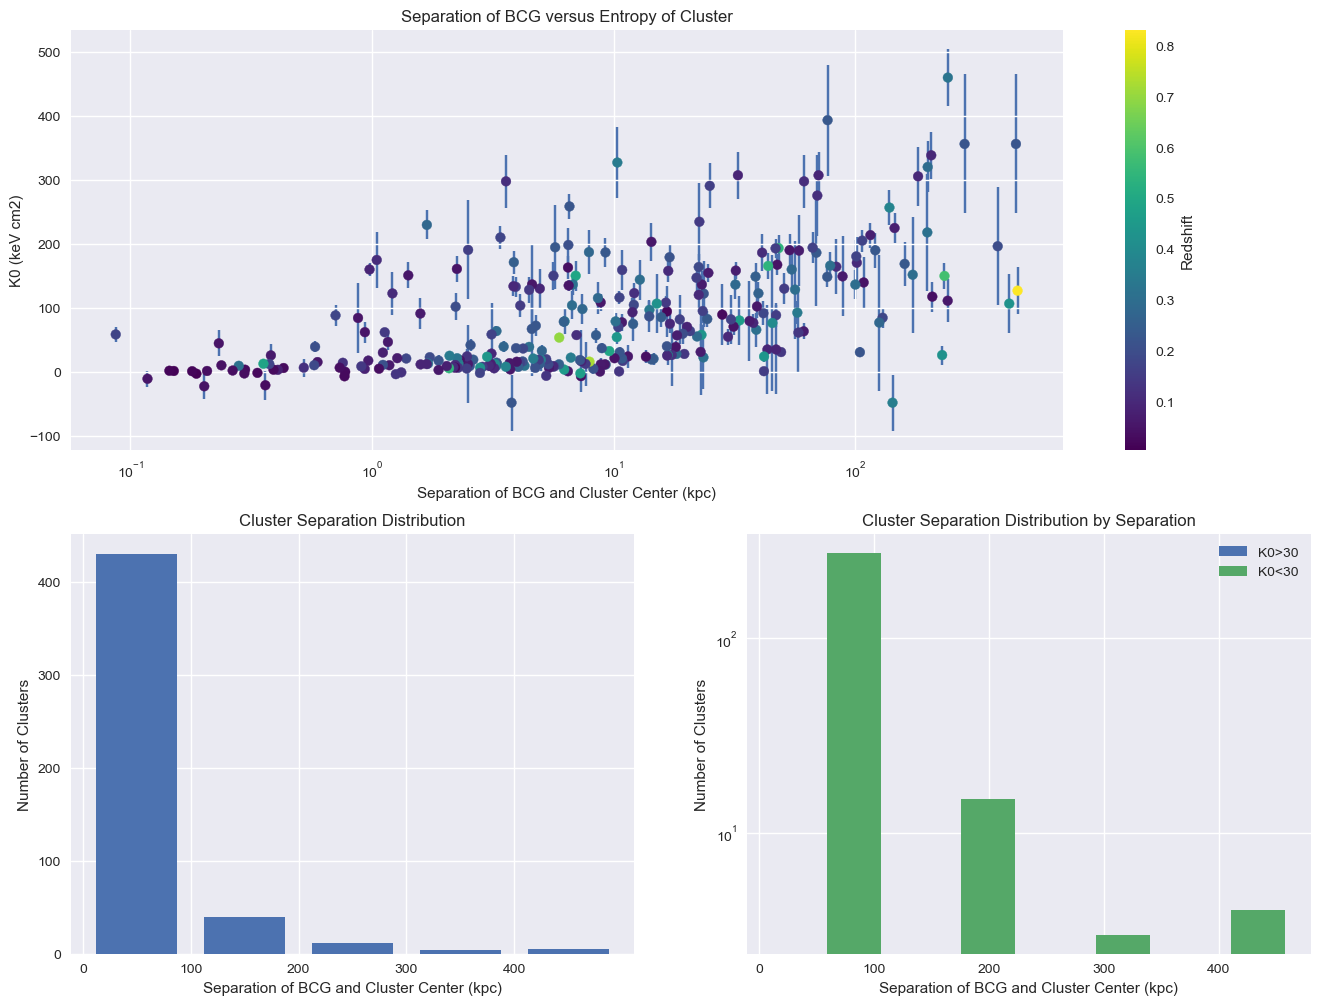

In [4]:
plt.subplots(figsize=(8*2, 6*2))
plt.subplot(2,1,1)

plt.scatter(data[:,0],data[:,2],c=data[:,1],cmap='viridis')
plt.colorbar(label='Redshift')
plt.errorbar(data[:,0],data[:,2],yerr=data[:,3],marker='',ls='',zorder=0)
plt.xlabel("Separation of BCG and Cluster Center (kpc)")
plt.ylabel("K0 (keV cm2)")
plt.title("Separation of BCG versus Entropy of Cluster")
plt.xscale('log')

plt.subplot(2,2,3)
truncated_seps = fulldata[:,0]
truncated_seps[truncated_seps>400]=450
truncated_seps
plt.hist(truncated_seps,bins=[0,100,200,300,400,500],rwidth=0.75)
plt.xticks([0,100,200,300,400])
plt.xlabel("Separation of BCG and Cluster Center (kpc)")
plt.ylabel('Number of Clusters')
plt.title("Cluster Separation Distribution")

plt.subplot(2,2,4)
plt.hist([k0over30[:,0],k0under30[:,0]],stacked=False,bins=4,label=['K0>30','K0<30'])
plt.legend()
plt.yscale('log')
plt.xlabel("Separation of BCG and Cluster Center (kpc)")
plt.ylabel('Number of Clusters')
plt.title("Cluster Separation Distribution by Separation")

plt.savefig('bcg_separation_vs_k0.png')
plt.show()